# HomeWork1_Intro_to_MachineLearning

Name : Sai Suma Podila


Emailid: spodila@uh.edu/ suma.ls146@gmail.com 

Student Id: 2149229

## Importing Packages

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Import a function for plotting decision boudaries
#!pip install mlxtend
from mlxtend.plotting import plot_decision_regions

## Loading the data

In [4]:
iris_df = pd.read_csv("iris_dataset.csv")
iris_df_mod = iris_df.copy()

## Viewing the sample data

In [5]:
#Checking the shape of the dataframe
iris_df_mod.shape

(150, 5)

In [6]:
#Displaying sample 5 records from top ad last
iris_df_mod.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
#Displaying species
iris_df_mod['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

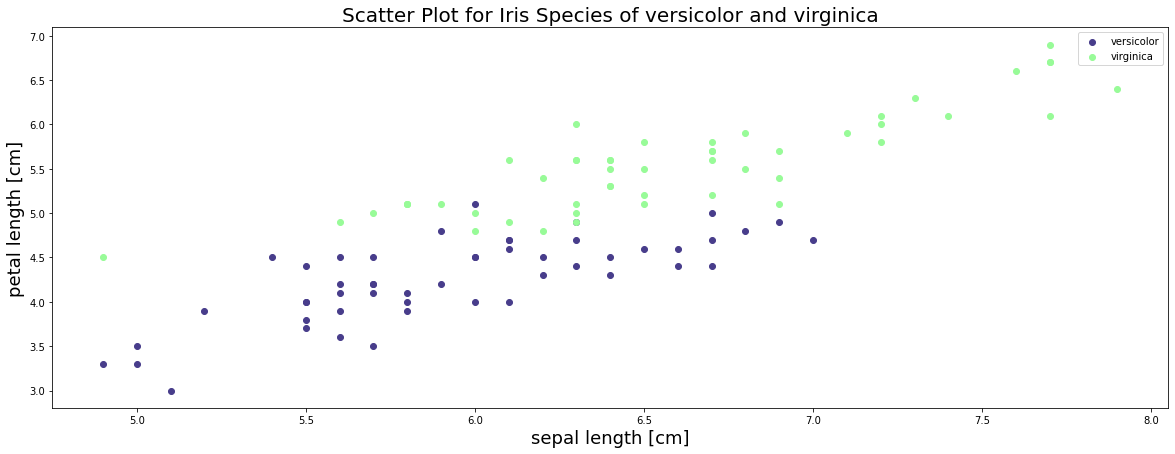

In [8]:
iris_df_mod1 = iris_df_mod[iris_df_mod.species=="versicolor"]
iris_df_mod2 = iris_df_mod[iris_df_mod.species=="virginica"]

plt.figure(figsize = (20, 7))

plt.scatter(iris_df_mod1.sepal_length, iris_df_mod1.petal_length, color="darkslateblue", label="versicolor")
plt.scatter(iris_df_mod2.sepal_length, iris_df_mod2.petal_length, color="palegreen", label="virginica")
plt.title("Scatter Plot for Iris Species of versicolor and virginica", fontsize = 20)
plt.xlabel("sepal length [cm]", fontsize=18)
plt.ylabel("petal length [cm]", fontsize=18)
plt.legend();


# Question 1

In [9]:
# Filtering versicolor and virginica records only for analysis

iris_df_mod_q1 = iris_df_mod.loc[iris_df_mod['species'].isin(['versicolor','virginica'])]
iris_df_mod_q1['species'].value_counts()

versicolor    50
virginica     50
Name: species, dtype: int64

In [10]:
X = iris_df_mod_q1[["sepal_length", "petal_length"]]
X

,sepal_length,petal_length
50,7.0,4.7
51,6.4,4.5
52,6.9,4.9
53,5.5,4.0
54,6.5,4.6
...,...,...
145,6.7,5.2
146,6.3,5.0
147,6.5,5.2
148,6.2,5.4


In [11]:
# Store the labels in y
y = iris_df_mod_q1['species']

# We can leave the original labels and use sklearn perceptron,
# but to use mlxtend for plotting we need to encode the labels
# versicolor = -1, virginica = 1

y = np.where(y == 'versicolor', -1, 1)

y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

## Sklearn Perceptron 

In [12]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html
from sklearn.linear_model import Perceptron

In [13]:
# Instantiate Perceptron class
clf = Perceptron()

# Fit the model
clf.fit(X, y)

Perceptron()

In [14]:
# Predict labels on X
y_pred = clf.predict(X)
y_pred

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1,  1,  1, -1,  1,  1,
        1, -1, -1,  1,  1, -1,  1,  1, -1, -1,  1, -1,  1, -1,  1, -1,  1,
       -1,  1,  1, -1, -1,  1, -1,  1,  1,  1, -1, -1, -1,  1,  1])

In [15]:
# Actual labels
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [16]:
# Compare actual and predicted labels
print(y == y_pred)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True False  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
 False False False  True  True False  True  True  True False False  True
  True False  True  True False False  True False  True False  True False
  True False  True  True False False  True False  True  True  True False
 False False  True  True]


C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


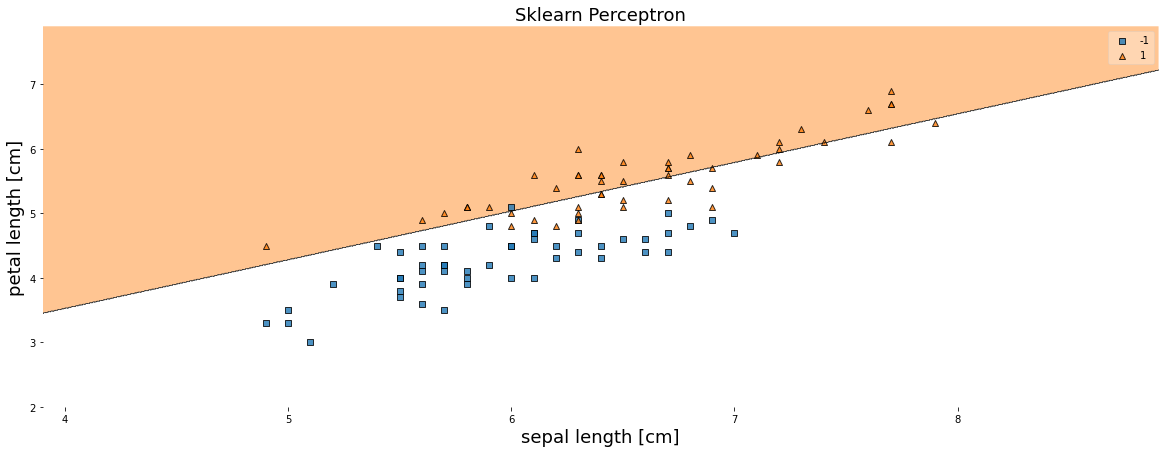

In [17]:
plt.figure(figsize = (20, 7))
plot_decision_regions(X.to_numpy(), y, clf = clf)
plt.title("Sklearn Perceptron", fontsize = 18)
plt.xlabel("sepal length [cm]", fontsize = 18)
plt.ylabel("petal length [cm]", fontsize = 18);

In [18]:
# We can use this classifier to predict the species of a flower with measurements 4 (sepal length) and 3 (petal length.)
# Obviously from the graph, the label should be -1. 

clf.predict([[4, 3]])

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


array([-1])

## Observation:

1. In build model is performing well compare to the custom model. 
2. from the graph the data is not able to linearly classify.

## Conclusion:
1. Bases on observations "versicolor" and "virginica" cannot not be linearly separable by using sepal_length" and "petal_length"
2. We need to consider one or more feature to better classification for "versicolor" and "virginica".

# Question 2:

In [19]:
# Filtering setosa and versicolor records only for analysis

iris_df_mod_q2 = iris_df_mod.loc[iris_df['species'].isin(['setosa','versicolor'])]
iris_df_mod_q2['species'].value_counts()

setosa        50
versicolor    50
Name: species, dtype: int64

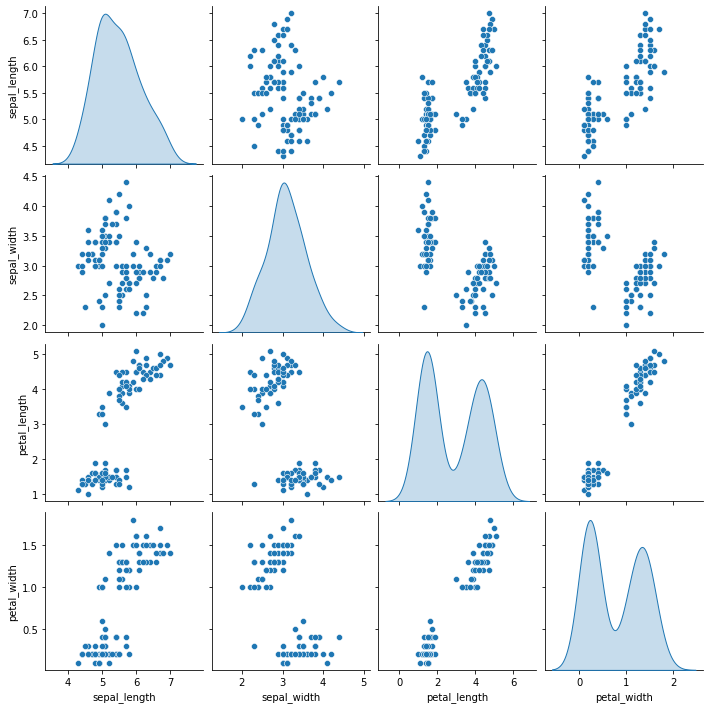

In [20]:
# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns# Plotting pairplot

sns.pairplot(iris_df_mod_q2, diag_kind="kde");

In [21]:
iris_df_mod_q2.groupby("species")["petal_width"].unique()


species
setosa                       [0.2, 0.4, 0.3, 0.1, 0.5, 0.6]
versicolor    [1.4, 1.5, 1.3, 1.6, 1.0, 1.1, 1.8, 1.2, 1.7]
Name: petal_width, dtype: object

In [22]:
iris_df.groupby("species")["petal_width"].unique()


species
setosa                           [0.2, 0.4, 0.3, 0.1, 0.5, 0.6]
versicolor        [1.4, 1.5, 1.3, 1.6, 1.0, 1.1, 1.8, 1.2, 1.7]
virginica     [2.5, 1.9, 2.1, 1.8, 2.2, 1.7, 2.0, 2.4, 2.3, ...
Name: petal_width, dtype: object

In [23]:
iris_df_mod_q2.groupby("species")["sepal_width"].unique()

species
setosa        [3.5, 3.0, 3.2, 3.1, 3.6, 3.9, 3.4, 2.9, 3.7, ...
versicolor    [3.2, 3.1, 2.3, 2.8, 3.3, 2.4, 2.9, 2.7, 2.0, ...
Name: sepal_width, dtype: object

# Observation

1. If we observe in pair plot, Comparing between sepal_width and petal_width, petal_width will add value to seperate between different species.
2. In plot, it is clearly visible its seprating between other inputs compare to sepal_width.
3. And also, if we see petal_width values its identical for different species.
   For Setosa values are between 0.2 and 0.6 where has versicolor values are between 1.0 and 1.8.

In [24]:
X = iris_df_mod_q2[["sepal_length", "petal_length","petal_width"]]
X

,sepal_length,petal_length,petal_width
0,5.1,1.4,0.2
1,4.9,1.4,0.2
2,4.7,1.3,0.2
3,4.6,1.5,0.2
4,5.0,1.4,0.2
...,...,...,...
95,5.7,4.2,1.2
96,5.7,4.2,1.3
97,6.2,4.3,1.3
98,5.1,3.0,1.1


In [25]:
# Store the labels in y
y = iris_df_mod_q2['species']

# We can leave the original labels and use sklearn perceptron,
# but to use mlxtend for plotting we need to encode the labels
# setosa = -1, versicolor = 1

y = np.where(y == 'setosa', -1, 1)

y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

## Sklearn Perceptron 

In [26]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html
from sklearn.linear_model import Perceptron

In [27]:
# Instantiate Perceptron class
clf = Perceptron()

# Fit the model
clf.fit(X, y)

Perceptron()

In [28]:
# Predict labels on X
y_pred = clf.predict(X)
y_pred

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [29]:
# Actual labels
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [30]:
# Compare actual and predicted labels
print(y == y_pred)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]


In [31]:
# We can use this classifier to predict the species of a flower with measurements 6 (sepal length) and 1 (petal length.)
# Obviously from the graph, the label should be 1. 

clf.predict([[4, 3, 2]])

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


array([1])

## Our own custom class for the perceptron algorithm


Recall, that python classes store data as class attribute and functions as class methods.
The perceptron class we will create will store a learning rate $\eta$, the number of iterations (epochs) $T$ when training, the weights $w_1$, $w_2$ and bias $b$, and the error incured during training at each iteration. This class will also contain input method, training method, and predict method.  

In [32]:
X = iris_df_mod_q2[["sepal_length", "petal_length","petal_width"]].to_numpy()
X

array([[5.1, 1.4, 0.2],
       [4.9, 1.4, 0.2],
       [4.7, 1.3, 0.2],
       [4.6, 1.5, 0.2],
       [5. , 1.4, 0.2],
       [5.4, 1.7, 0.4],
       [4.6, 1.4, 0.3],
       [5. , 1.5, 0.2],
       [4.4, 1.4, 0.2],
       [4.9, 1.5, 0.1],
       [5.4, 1.5, 0.2],
       [4.8, 1.6, 0.2],
       [4.8, 1.4, 0.1],
       [4.3, 1.1, 0.1],
       [5.8, 1.2, 0.2],
       [5.7, 1.5, 0.4],
       [5.4, 1.3, 0.4],
       [5.1, 1.4, 0.3],
       [5.7, 1.7, 0.3],
       [5.1, 1.5, 0.3],
       [5.4, 1.7, 0.2],
       [5.1, 1.5, 0.4],
       [4.6, 1. , 0.2],
       [5.1, 1.7, 0.5],
       [4.8, 1.9, 0.2],
       [5. , 1.6, 0.2],
       [5. , 1.6, 0.4],
       [5.2, 1.5, 0.2],
       [5.2, 1.4, 0.2],
       [4.7, 1.6, 0.2],
       [4.8, 1.6, 0.2],
       [5.4, 1.5, 0.4],
       [5.2, 1.5, 0.1],
       [5.5, 1.4, 0.2],
       [4.9, 1.5, 0.1],
       [5. , 1.2, 0.2],
       [5.5, 1.3, 0.2],
       [4.9, 1.5, 0.1],
       [4.4, 1.3, 0.2],
       [5.1, 1.5, 0.2],
       [5. , 1.3, 0.3],
       [4.5, 1.3

In [33]:
class MyPerceptron_q2(object):
    def __init__(self, eta = 0.5, epochs = 100):
        self.eta = eta
        self.epochs = epochs
        
    def fit(self, X, y):
        self.w1 = np.random.rand(1)
        self.w2 = np.random.rand(1)
        self.w3 = np.random.rand(1)
        self.b = np.random.rand(1)
        
        self.errors = []
        
        for _ in range(self.epochs):
            errors = 0
            for xi, yi in zip(X, y):
                update = self.eta * (self.predict(xi) - yi)
                #update = self.eta * (yi- self.predict(xi))
                self.w1 = self.w1 - update*xi[0]
                self.w2 = self.w1 - update*xi[1]
                self.w3 = self.w1 - update*xi[1]
                self.b = self.b - update
                errors = errors + int(update != 0)
            if errors == 0:
                return self
            else:
                self.errors.append(errors)
            
        return self
    
    def weighted_sum(self, x):
        self.w = np.array([self.w1, self.w2,self.w3])
        return np.dot(x, self.w) + self.b
    
    def predict(self, x):
        return np.where(self.weighted_sum(x) >= 0.0, 1, -1)

In [34]:
# Instantiate one instance of My_Perceptron class
my_clf_q2 = MyPerceptron_q2()

# Call the fit method 
my_clf_q2.fit(X, y)

In [35]:
# Predict labels on X
y_pred = my_clf_q2.predict(X)
y_pred

array([[-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],

In [36]:
y_pred = y_pred.reshape(100)
y_pred

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [37]:
# Compare actual and predicted labels
print(y == y_pred)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]


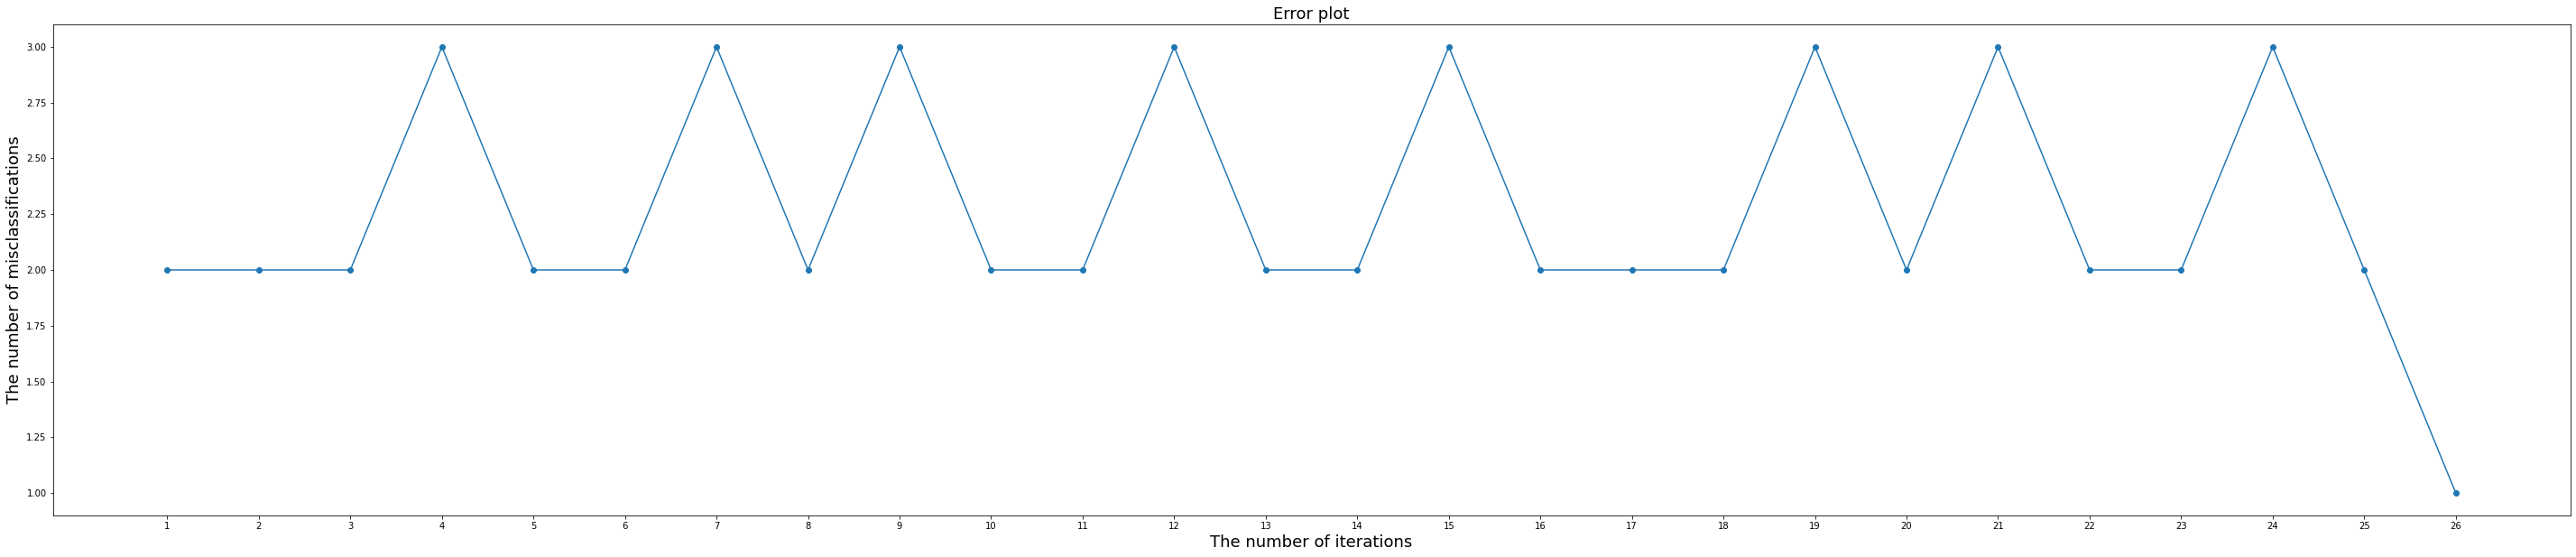

In [38]:
# We plot the errors for each iteration
# We also see the number of iterations needed for the algorithm to find the classifier

plt.figure(figsize = (50, 10))
plt.plot(range(1, len(my_clf_q2.errors)+1), my_clf_q2.errors, 
         marker = "o")
plt.title("Error plot", fontsize = 18)
plt.xlabel("The number of iterations", fontsize = 18)
plt.ylabel("The number of misclassifications", fontsize = 18)
plt.xticks(range(1, len(my_clf_q2.errors)+1))
plt.show()

# Observation 

By adding one more feature "pedal_width" error reached to "1" in 26 iteration

# Question 3

Below is the function can be used to any number of features can be passed.

In [39]:
class MyPerceptron_Any_No_Of_Inputs(object):
    def __init__(self, eta = 0.5, epochs = 100):
        self.eta = eta
        self.epochs = epochs
        self.b = 0.0  # y-intercept
        self.w = None  # weights assigned to input features
        
    def fit(self, X, y):
        self.b = 0.0
        self.w = np.zeros(X.shape[1])
        
        self.errors = []
        
        for _ in range(self.epochs):
            errors = 0
            for xi, yi in zip(X, y):
                update = self.eta * (self.predict(xi) - yi)
                #update = self.eta * (yi- self.predict(xi))
                self.b = self.b - update
                self.w = self.w - update*xi[0]
                errors = errors + int(update != 0)
            if errors == 0:
                return self
            else:
                self.errors.append(errors)
            
        return self
    
    def weighted_sum(self, x):
        return np.dot(x, self.w) + self.b
    
    def predict(self, x):
        return np.where(self.weighted_sum(x) >= 0.0, 1, -1)
    
       

Passing two features("sepal_length","petal_length","petal_width") to the model(MyPerceptron_Any_No_Of_Inputs)

In [40]:
X = iris_df_mod_q2[["sepal_length", "petal_length"]].to_numpy()
X

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3],
       [4.6, 1.5],
       [5. , 1.4],
       [5.4, 1.7],
       [4.6, 1.4],
       [5. , 1.5],
       [4.4, 1.4],
       [4.9, 1.5],
       [5.4, 1.5],
       [4.8, 1.6],
       [4.8, 1.4],
       [4.3, 1.1],
       [5.8, 1.2],
       [5.7, 1.5],
       [5.4, 1.3],
       [5.1, 1.4],
       [5.7, 1.7],
       [5.1, 1.5],
       [5.4, 1.7],
       [5.1, 1.5],
       [4.6, 1. ],
       [5.1, 1.7],
       [4.8, 1.9],
       [5. , 1.6],
       [5. , 1.6],
       [5.2, 1.5],
       [5.2, 1.4],
       [4.7, 1.6],
       [4.8, 1.6],
       [5.4, 1.5],
       [5.2, 1.5],
       [5.5, 1.4],
       [4.9, 1.5],
       [5. , 1.2],
       [5.5, 1.3],
       [4.9, 1.5],
       [4.4, 1.3],
       [5.1, 1.5],
       [5. , 1.3],
       [4.5, 1.3],
       [4.4, 1.3],
       [5. , 1.6],
       [5.1, 1.9],
       [4.8, 1.4],
       [5.1, 1.6],
       [4.6, 1.4],
       [5.3, 1.5],
       [5. , 1.4],
       [7. , 4.7],
       [6.4, 4.5],
       [6.9,

In [41]:
# Store the labels in y
y = iris_df_mod_q2['species']

# We can leave the original labels and use sklearn perceptron,
# but to use mlxtend for plotting we need to encode the labels
# versicolor = -1, virginica = 1

y = np.where(y == 'versicolor', -1, 1)

y

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [42]:
# Instantiate one instance of My_Perceptron class
my_clf_q3 = MyPerceptron_Any_No_Of_Inputs()

# Call the fit method 
my_clf_q3.fit(X, y)

In [43]:
# Predict labels on X
y_pred = my_clf_q3.predict(X)
y_pred

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [44]:
# Compare actual and predicted labels
print(y == y_pred)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]


Passing three features to the model(MyPerceptron_Any_No_Of_Inputs)

In [45]:
X = iris_df_mod_q2[["sepal_length", "petal_length","petal_width"]].to_numpy()
X

array([[5.1, 1.4, 0.2],
       [4.9, 1.4, 0.2],
       [4.7, 1.3, 0.2],
       [4.6, 1.5, 0.2],
       [5. , 1.4, 0.2],
       [5.4, 1.7, 0.4],
       [4.6, 1.4, 0.3],
       [5. , 1.5, 0.2],
       [4.4, 1.4, 0.2],
       [4.9, 1.5, 0.1],
       [5.4, 1.5, 0.2],
       [4.8, 1.6, 0.2],
       [4.8, 1.4, 0.1],
       [4.3, 1.1, 0.1],
       [5.8, 1.2, 0.2],
       [5.7, 1.5, 0.4],
       [5.4, 1.3, 0.4],
       [5.1, 1.4, 0.3],
       [5.7, 1.7, 0.3],
       [5.1, 1.5, 0.3],
       [5.4, 1.7, 0.2],
       [5.1, 1.5, 0.4],
       [4.6, 1. , 0.2],
       [5.1, 1.7, 0.5],
       [4.8, 1.9, 0.2],
       [5. , 1.6, 0.2],
       [5. , 1.6, 0.4],
       [5.2, 1.5, 0.2],
       [5.2, 1.4, 0.2],
       [4.7, 1.6, 0.2],
       [4.8, 1.6, 0.2],
       [5.4, 1.5, 0.4],
       [5.2, 1.5, 0.1],
       [5.5, 1.4, 0.2],
       [4.9, 1.5, 0.1],
       [5. , 1.2, 0.2],
       [5.5, 1.3, 0.2],
       [4.9, 1.5, 0.1],
       [4.4, 1.3, 0.2],
       [5.1, 1.5, 0.2],
       [5. , 1.3, 0.3],
       [4.5, 1.3

In [46]:
# Instantiate one instance of My_Perceptron class
my_clf_q3 = MyPerceptron_Any_No_Of_Inputs()

# Call the fit method 
my_clf_q3.fit(X, y)

In [47]:
# Predict labels on X
y_pred = my_clf_q3.predict(X)
y_pred

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [48]:
# Compare actual and predicted labels
print(y == y_pred)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]


Finding the accuary of the model

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [50]:
my_clf_q3.fit(X_train, y_train)

In [51]:
y_pred = my_clf_q3.predict(X_test)
y_pred

array([-1, -1,  1, -1, -1,  1,  1, -1, -1, -1, -1,  1, -1, -1, -1,  1,  1,
        1, -1,  1,  1, -1, -1, -1,  1,  1, -1,  1,  1,  1])

In [52]:
print('Test Accuracy: %.4f' %accuracy_score(y_test,y_pred))

Test Accuracy: 1.0000


Thank you